# Chap03 - 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 아래와 같다. 입력층, 은닉층, 출력층은 차례로 0층, 1층, 2층이라 하고 아래의 그림은 **2층 신경망**이다. 그 이유는 가중치($w$, weight)를 갖는 층은 2개뿐이기 때문이다.

<img src="./images/3-01.png" width="50%" height="50%"/>

### 3.1.2 퍼셉트론 복습

신경망의 신호 전달 방법을 알아보기 전에 [2장](https://github.com/ExcelsiorCJH/DLFromScratch/blob/master/Chap02-Perceptron/Chap02-Perceptron.ipynb)에서 배웠던 퍼셉트론을 복습해보자. 

<img src="./images/3-03.png" width="30%" height="30%"/>

$$
y=\begin{cases} 0\quad (b + w_1x_1 +w_2x_2 \le 0) \\ 1 \quad (b + w_1x_1 + w_2x_2 > 0) \end{cases}
$$

여기서 $b$는 **편향(bias)** 을 나타내는 매개변수로 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. $w_1$과 $w_2$는 각 신호의 **가중치(weight)** 를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

위의 식을 다음과 같이 더 간결한 형태로 나타내보자.

$$
y = h(b+ w_1 x_1 + w_2 x_2)
$$
$$
y = h(x)=\begin{cases} 0\quad (x \le 0) \\ 1 \quad (x > 0) \end{cases}
$$

위의 식에서 입력의 총합($b+ w_1 x_1 + w_2 x_2$)이 $h(x)$라는 함수를 거쳐 변환된 뒤, 그 출력값이 $y$가 된다.

### 3.1.3 활성화 함수의 등장

위에서 $h(x)$라는 함수처럼, 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 함수(activation function)** 이라고 한다. 이름에서도 알 수 있듯이 활성화 함수는 입력 신호의 총합이 **활성화를 일으키는지를 정하는 역할**을 한다. 위의 식을 다시 써보고 이를 그림으로 나타내 보자.

$$
a = b + w_1 x_1 + w_2 x_2
$$
$$
y = h(a)
$$

<img src="./images/3-04.png" width="30%" height="30%"/>

## 3.2 활성화 함수

활성화 함수는 임계값(0)을 경계로 출력이 변하는데, 이런 함수를 **계단함수(step function)** 라 한다. 따라서, "퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다"라고 할 수 있다. 

그렇다면, 계단함수 말고 다른 함수를 사용하면 어떻게 될까? 이것이 바로 신경망으로 나아가는 핵심이 된다.

### 3.2.1 시그모이드 함수

신경망에서 자주 사용되는 활성화 함수 중 하나는 **시그모이드 함수(sigmoid function)**다. 시그모이드(sigmoid)란 'S자 모양'이라는 뜻으로 그래프의 모양을 따서 지은 것이라 한다.

$$
h(x) = \frac{1}{1 + \text{exp}(-x)}
$$

<img src="./images/3-07.png" width="50%" height="50%"/>

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 2장에서 알아본 퍼셉트론과 신경망과의 주된 차이는 활성화 함수라고 할 수 있다.

### 3.2.2~3 계단함수 구현 및 그래프

이제 파이썬을 가지고 계단함수를 구현해보도록 하자. 계단함수는 입력이 0을 넘으면 1을 출력하고 그 외에는 0을 출력하는 함수다.

In [1]:
import numpy as np
import matplotlib.pylab as plt

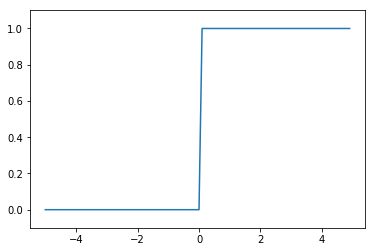

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

이번에는 시그모이드 함수를 구현해보자. 

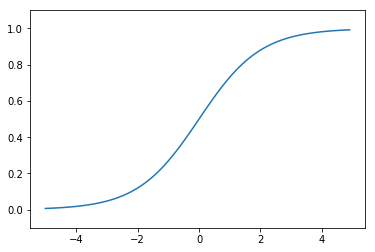

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [5]:
x = np.array([-1., 1., 2.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

### 3.2.5 시그모이드 함수와 계단 함수 비교

계단함수와 시그모이드 함수를 각각 살펴보았다. 이제 두 함수의 차이가 무엇인지 알아보자. 

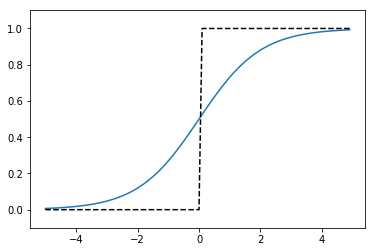

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

위의 그래프에서 볼 수 있듯이, 계단함수와 시그모이드 함수의 차이는 **'연속성'** 이다. 시그모이드 함수는 곡선이며 입력에 따라 출력이 연속적으로 변하지만, 계단함수는 0을 기준으로 출력이 불연속적으로 변한다. 이러한 시그모이드 함수의 연속성이 신경망 학습에서 중요한 역할을 하게된다.

그리고 계단함수는 0과 1 중 하나의 값만 반환하는 반면, 시그모이드 함수는 0과 1사이의 실수(0.723..., 0.232... 등)를 반환한다. 즉, 퍼셉트론에서는 뉴런(노드)사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적인 실수가 흐른다. 계단함수와 시그모이드 함수 둘 다 입력이 중요하면 큰 값(1에 가까운)을 출력하고 입력이 중요하지 않으면 작은값(0에 가까운)을 출력하며, 입력이 아무리 크거나 작아도 시그모이드 함수의 출력은 항상 0에서 1사이이다.

### 3.2.6 비선형 함수

시그모이드 함수는 **비선형 함수(non-linear function)**이다. 

> **신경망에서는 활성화 함수로 비선형 함수를 사용해야한다.** 

왜 그럴까? 그 이유는 선형함수를 이용하면 신경망의 층을 깊게 하는 의미가 없기 때문이다. 예를 들어 활성화 함수로 $h(x) = cx$를 사용하여 3층 신경망을 구성한다고 하면 $y(x) = h(h(h(x)))$이 되며 이것은 $y(x) = c \times c \times c \times x = c^3 x$ 같다. 즉, 활성화 함수를 $h(x) = c^3 x$로 한번만 사용하여 나타낼 수 있기 때문에 여러 층으로 신경망을 구성하는 이점을 살릴 수 없다.

### 3.2.7 ReLU 함수

신경망에서 자주 사용되는 또다른 활성화 함수인 **ReLU(Rectified Linear Unit, 렐루)**에 대해 알아보자. ReLU는 입력이 0을 넘으면 입력 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다. 

$$
h(x)=\begin{cases} x \quad (x > 0) \\ 0 \quad (x \le 0) \end{cases}
$$

<img src="./images/3-09.png" width="50%" height="50%"/>

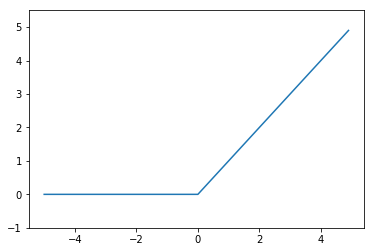

In [8]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1.0, 5.5)  # y축의 범위 지정
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

여기서는`numpy`를 이용한 다차원 배열에 대해 알아보자.

In [9]:
import numpy as np

In [12]:
# 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print('np.ndim(A) :', np.ndim(A))
print('A.shape :', A.shape)
print('A.shape[0] :', A.shape[0])

[1 2 3 4]
np.ndim(A) : 1
A.shape : (4,)
A.shape[0] : 4


In [13]:
# 2차원 배열
B = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

print(B)
print('np.ndim(B) :', np.ndim(B))
print('B.shape :', B.shape)
print('B.shape[0] :', B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
np.ndim(B) : 2
B.shape : (3, 2)
B.shape[0] : 3


### 3.3.2 행렬의 내적(행렬 곱)

<img src="./images/3-11.png" width="60%" height="60%"/>